





# Anomaly Detection
Gabor Kovacs | CAP 5625 | 9/19/2020
***








In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
salaries = pd.read_csv('salaries.csv')
salaries.head(10)

,Salary
0,26100
1,73188
2,33333333333
3,14623
4,44444444444
5,95759
6,22368
7,90715
8,18507
9,11559


In [3]:
model_1 = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.2), max_features=1.0)
model_1.fit(salaries[['Salary']])

IsolationForest(contamination=0.2, n_estimators=50)

#### n_estimators: 
The number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. The default value is 100.

#### max_samples: 
The number of samples to be drawn to train each base estimator. If max_samples is more than the number of samples provided, all samples will be used for all trees. The default value of max_samples is 'auto'. If 'auto', then max_samples=min(256, n_samples)

#### contamination: 
The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.  This is the most important parameter to set. If we set contamination to say 0.1, then we are telling the algorithm that we expect 10% of our data to be anomalous. 

#### max_features: 
The number of features to draw from X to train each base estimator.
The decision_function gives us the average anomaly score of X of the base classifiers.  We can append this back into our dataframe. Then, we use the predict method to predict if a particular sample is an outlier or not and append that as well. 


#### Decision Function

The decision_function gives us the average anomaly score of X of the base classifiers.  We can append this back into our dataframe. Then, we use the predict method to predict if a particular sample is an outlier or not and append that as well. 

#### Predict function
The predict method tells us whether an observation is an anomaly or not (+1 or -1).

In [4]:
salaries['Scores'] = model_1.decision_function(salaries[['Salary']])
salaries['Anomaly'] = model_1.predict(salaries[['Salary']])
salaries.head(10)

,Salary,Scores,Anomaly
0,26100,0.111061,1
1,73188,0.041914,1
2,33333333333,-0.164024,-1
3,14623,0.127371,1
4,44444444444,-0.200733,-1
5,95759,0.041006,1
6,22368,0.135623,1
7,90715,0.063810,1
8,18507,0.129292,1
9,11559,0.082865,1


### Example 2

For the next example, I wanted to utilize a dataset that had multiple dimensions/features to incorporate into the model. After looking around a bit, I thought I would just make my own. In the following example, I am creating a dataset with 3 features and 5000 observations.  The observations are chosen from the normal distribution with a mean of 0 and standard deviation of 1. I am naming the features as x, y, and z. The setup and library imports are the same as above. Here is the code to create our sample data:

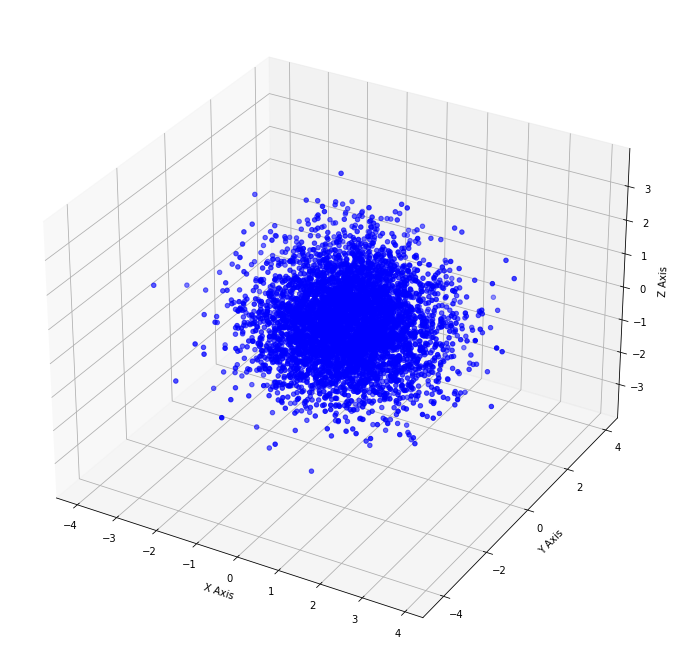

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

numbers = 5000

x = np.random.normal(loc=0, scale=1.0, size=numbers) 
y = np.random.normal(loc=0, scale=1.0, size=numbers) 
z = np.random.normal(loc=0, scale=1.0, size=numbers) 

ax.scatter(x,y,z,color='blue')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()

In [6]:
# View Data
data=np.array([x,y,z]).T
_3d_sample_data = pd.DataFrame(data=data, columns=['X', 'Y', 'Z'])

In [7]:
_3d_sample_data

,X,Y,Z
0,0.366605,-1.355799,-0.458747
1,-0.185983,-0.332038,0.282143
2,-2.709007,-1.552326,0.169415
3,0.622492,0.422692,0.741877
4,-0.124094,3.053714,-1.310838
...,...,...,...
4995,0.546637,-0.316955,-2.549805
4996,0.169983,-0.802879,0.138104
4997,-0.296101,-0.205309,0.183818
4998,0.632250,-1.425261,-1.061056


We can already see from the image above that the vast majority of the samples fall within the center of all 3 axis, x, y, and z.  We can also see that a few samples are on the outskirts.  Given a normal distribution, what percentage of samples would we expect to see outside of the “norm”? 
From the 68–95–99.7 rule (aka empirical rule), we know that 68% of this data should fall within 1 standard deviation, 95% within 2 standard deviations, and 99.7% within 3 standard deviations.  So…if 99.7% of our data falls within 3 standard deviations, then I would expect 0.3% to be outside of this range, let’s define these as our outliers.


In [8]:
# Contamination: Find observations 3 standard deviations away
model_2 = IsolationForest(contamination=float(0.003))
model_2.fit(_3d_sample_data[['X', 'Y', 'Z']])

IsolationForest(contamination=0.003)

In [9]:
_3d_sample_data['Scores'] = model_2.decision_function(_3d_sample_data[['X', 'Y', 'Z']])
_3d_sample_data['Anomaly'] = model_2.predict(_3d_sample_data[['X', 'Y', 'Z']])

In [10]:
# Find only the outliers for display
outliers = _3d_sample_data[_3d_sample_data.Anomaly == -1]

In [11]:
outliers

,X,Y,Z,Scores,Anomaly
237,0.051457,3.769068,-2.225194,-0.028530,-1
783,2.294582,-1.239334,-2.071391,-0.019674,-1
821,0.984250,-2.025872,3.151412,-0.011270,-1
1480,-0.439318,2.935059,-2.234239,-0.018317,-1
1556,-0.103233,-3.081701,-1.866638,-0.000152,-1
1823,2.095054,1.546888,-2.263229,-0.013287,-1
2132,-2.801474,0.889841,2.394081,-0.031053,-1
2143,0.141462,3.876135,-1.839109,-0.004532,-1
2400,2.787092,2.004682,1.689775,-0.007882,-1
2770,-1.906646,3.390726,-1.237779,-0.011693,-1


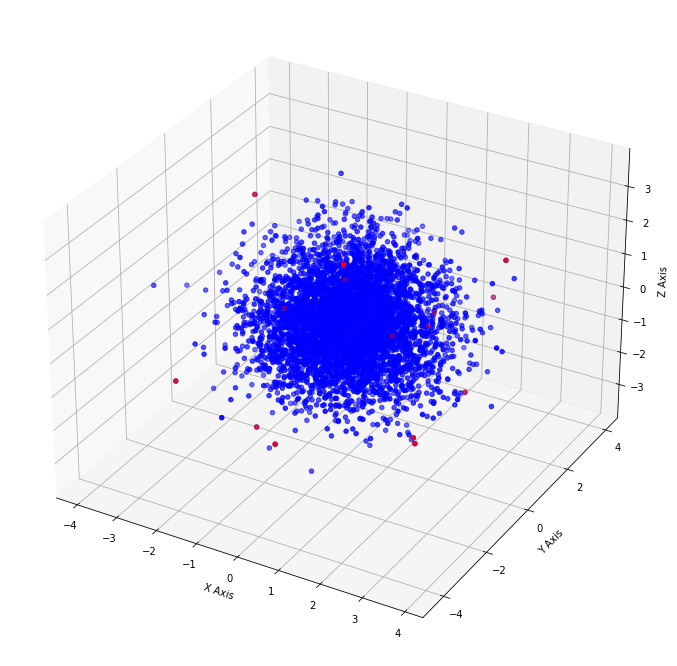

In [12]:
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

ax.scatter(x,y,z, color='blue')
ax.scatter(outliers.X, outliers.Y, outliers.Z, color='red')

ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

plt.show()